In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_excel("Power_generation_1991-2022.xlsx",index_col='Datetime',parse_dates=True)
df.index.freq='MS'

In [4]:
df.head()

,Power_Generation
Datetime,
1991-01-01,18870.0
1991-02-01,17446.5
1991-03-01,12518.0
1991-04-01,7087.0
1991-05-01,3888.0


In [5]:
df.index.freq='MS'

<Axes: xlabel='Datetime'>

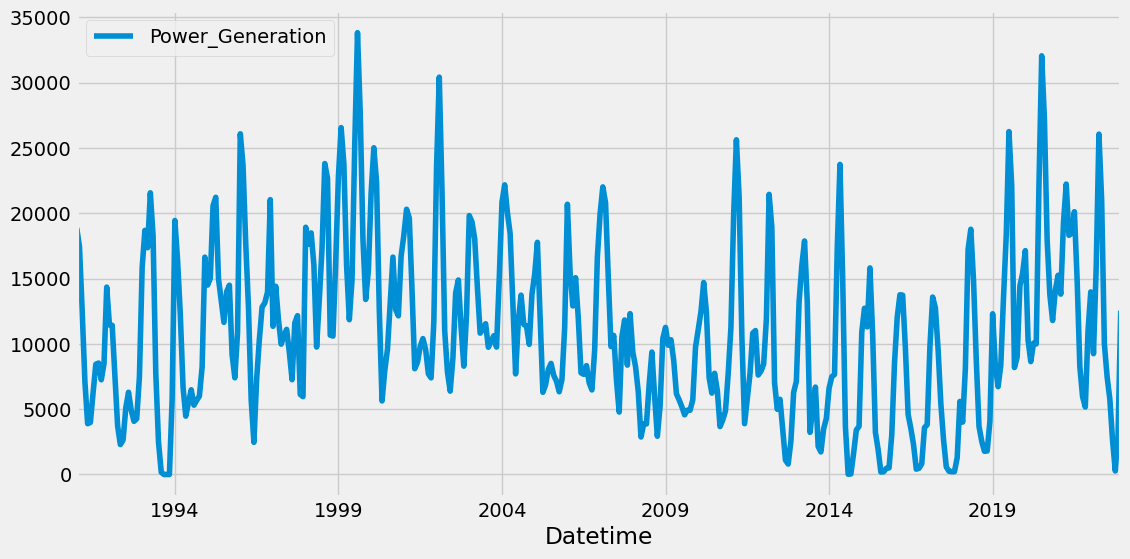

In [6]:
df.plot(figsize=(12,6))

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [8]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [10]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 2),
                                seasonal_order=(1, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0377      0.042     -0.903      0.367      -0.120       0.044
ma.L2         -0.6642      0.039    -16.907      0.000      -0.741      -0.587
ar.S.L12       0.0098      0.059      0.167      0.868      -0.105       0.125
ma.S.L12      -1.7440      0.050    -34.964      0.000      -1.842      -1.646
ma.S.L24       0.7552      0.045     16.706      0.000       0.667       0.844
sigma2      1.235e+07   1.89e-09   6.52e+15      0.000    1.23e+07    1.23e+07


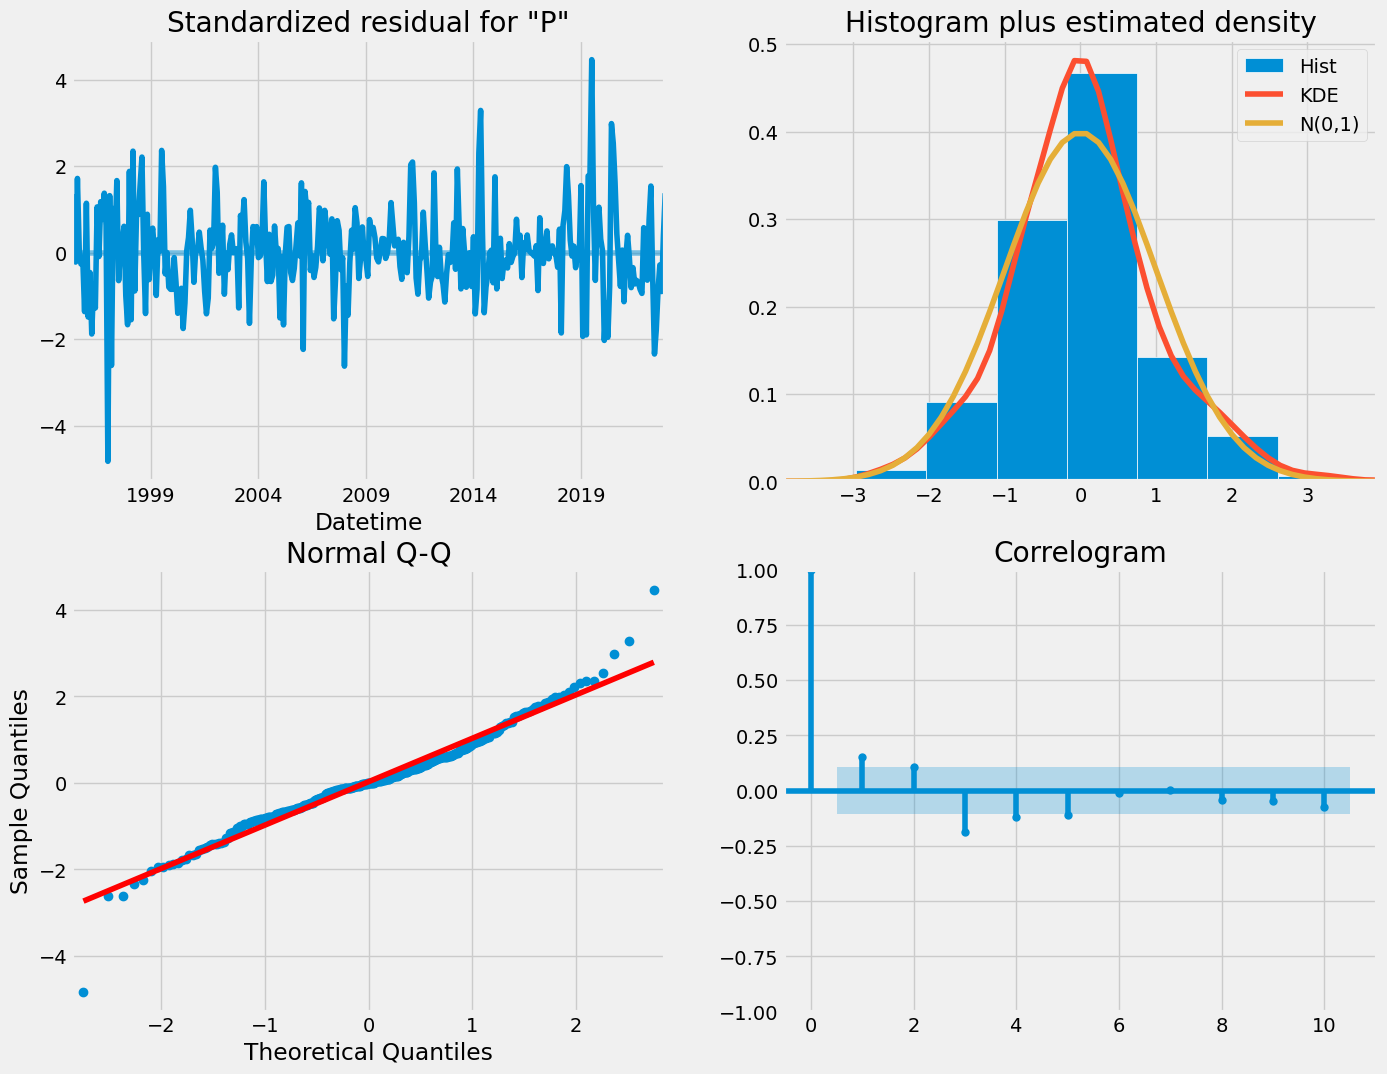

In [11]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()

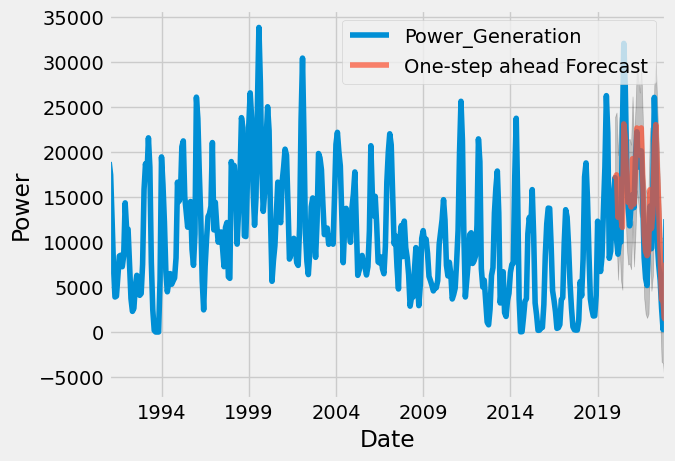

In [27]:
ax = df['1991':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Power')
plt.legend()

plt.show()

In [28]:
df_forecasted = pred.predicted_mean
df_truth = df['2020-01-01':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2020-01-01 00:00:00   NaN
2020-02-01 00:00:00   NaN
2020-03-01 00:00:00   NaN
2020-04-01 00:00:00   NaN
2020-05-01 00:00:00   NaN
2020-06-01 00:00:00   NaN
2020-07-01 00:00:00   NaN
2020-08-01 00:00:00   NaN
2020-09-01 00:00:00   NaN
2020-10-01 00:00:00   NaN
2020-11-01 00:00:00   NaN
2020-12-01 00:00:00   NaN
2021-01-01 00:00:00   NaN
2021-02-01 00:00:00   NaN
2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
2022-02-01 00:00:00   NaN
2022-03-01 00:00:00   NaN
2022-04-01 00:00:00   NaN
2022-05-01 00:00:00   NaN
2022-06-01 00:00:00   NaN
2022-07-01 00:00:00   NaN
2022-08-01 00:00:00   NaN
2022-09-01 00:00:00   NaN
2022-10-01 00:00:00   NaN
2022-11-01 00:00:00   NaN
2022-12-01 00:00:00   NaN
Power_Generation     

In [29]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


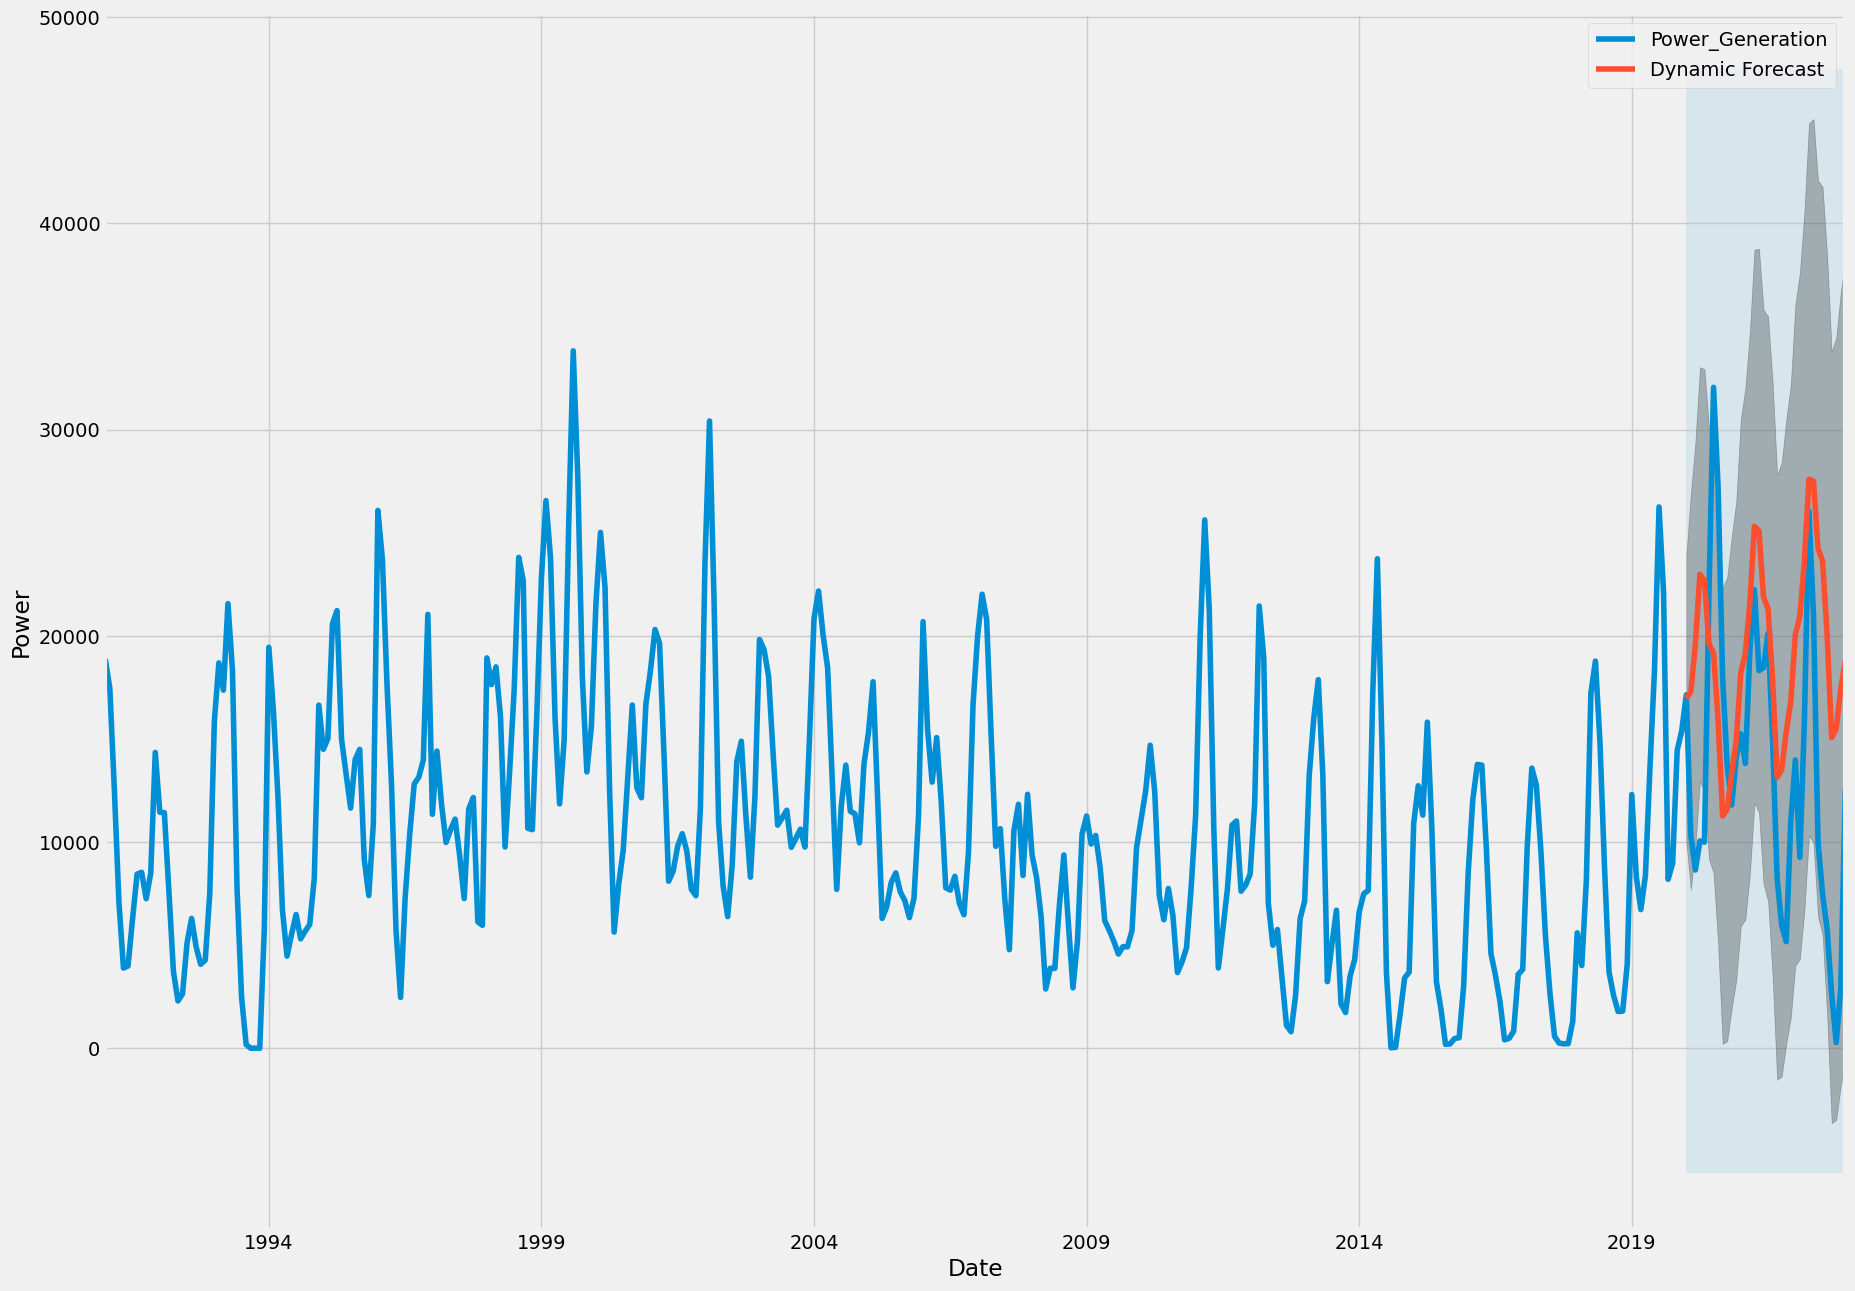

In [30]:
ax = df['1991':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), df.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Power')

plt.legend()
plt.show()

In [35]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = df['2022-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2020-01-01 00:00:00   NaN
2020-02-01 00:00:00   NaN
2020-03-01 00:00:00   NaN
2020-04-01 00:00:00   NaN
2020-05-01 00:00:00   NaN
2020-06-01 00:00:00   NaN
2020-07-01 00:00:00   NaN
2020-08-01 00:00:00   NaN
2020-09-01 00:00:00   NaN
2020-10-01 00:00:00   NaN
2020-11-01 00:00:00   NaN
2020-12-01 00:00:00   NaN
2021-01-01 00:00:00   NaN
2021-02-01 00:00:00   NaN
2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
2022-02-01 00:00:00   NaN
2022-03-01 00:00:00   NaN
2022-04-01 00:00:00   NaN
2022-05-01 00:00:00   NaN
2022-06-01 00:00:00   NaN
2022-07-01 00:00:00   NaN
2022-08-01 00:00:00   NaN
2022-09-01 00:00:00   NaN
2022-10-01 00:00:00   NaN
2022-11-01 00:00:00   NaN
2022-12-01 00:00:00   NaN
Power_Generation     

In [36]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=120)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

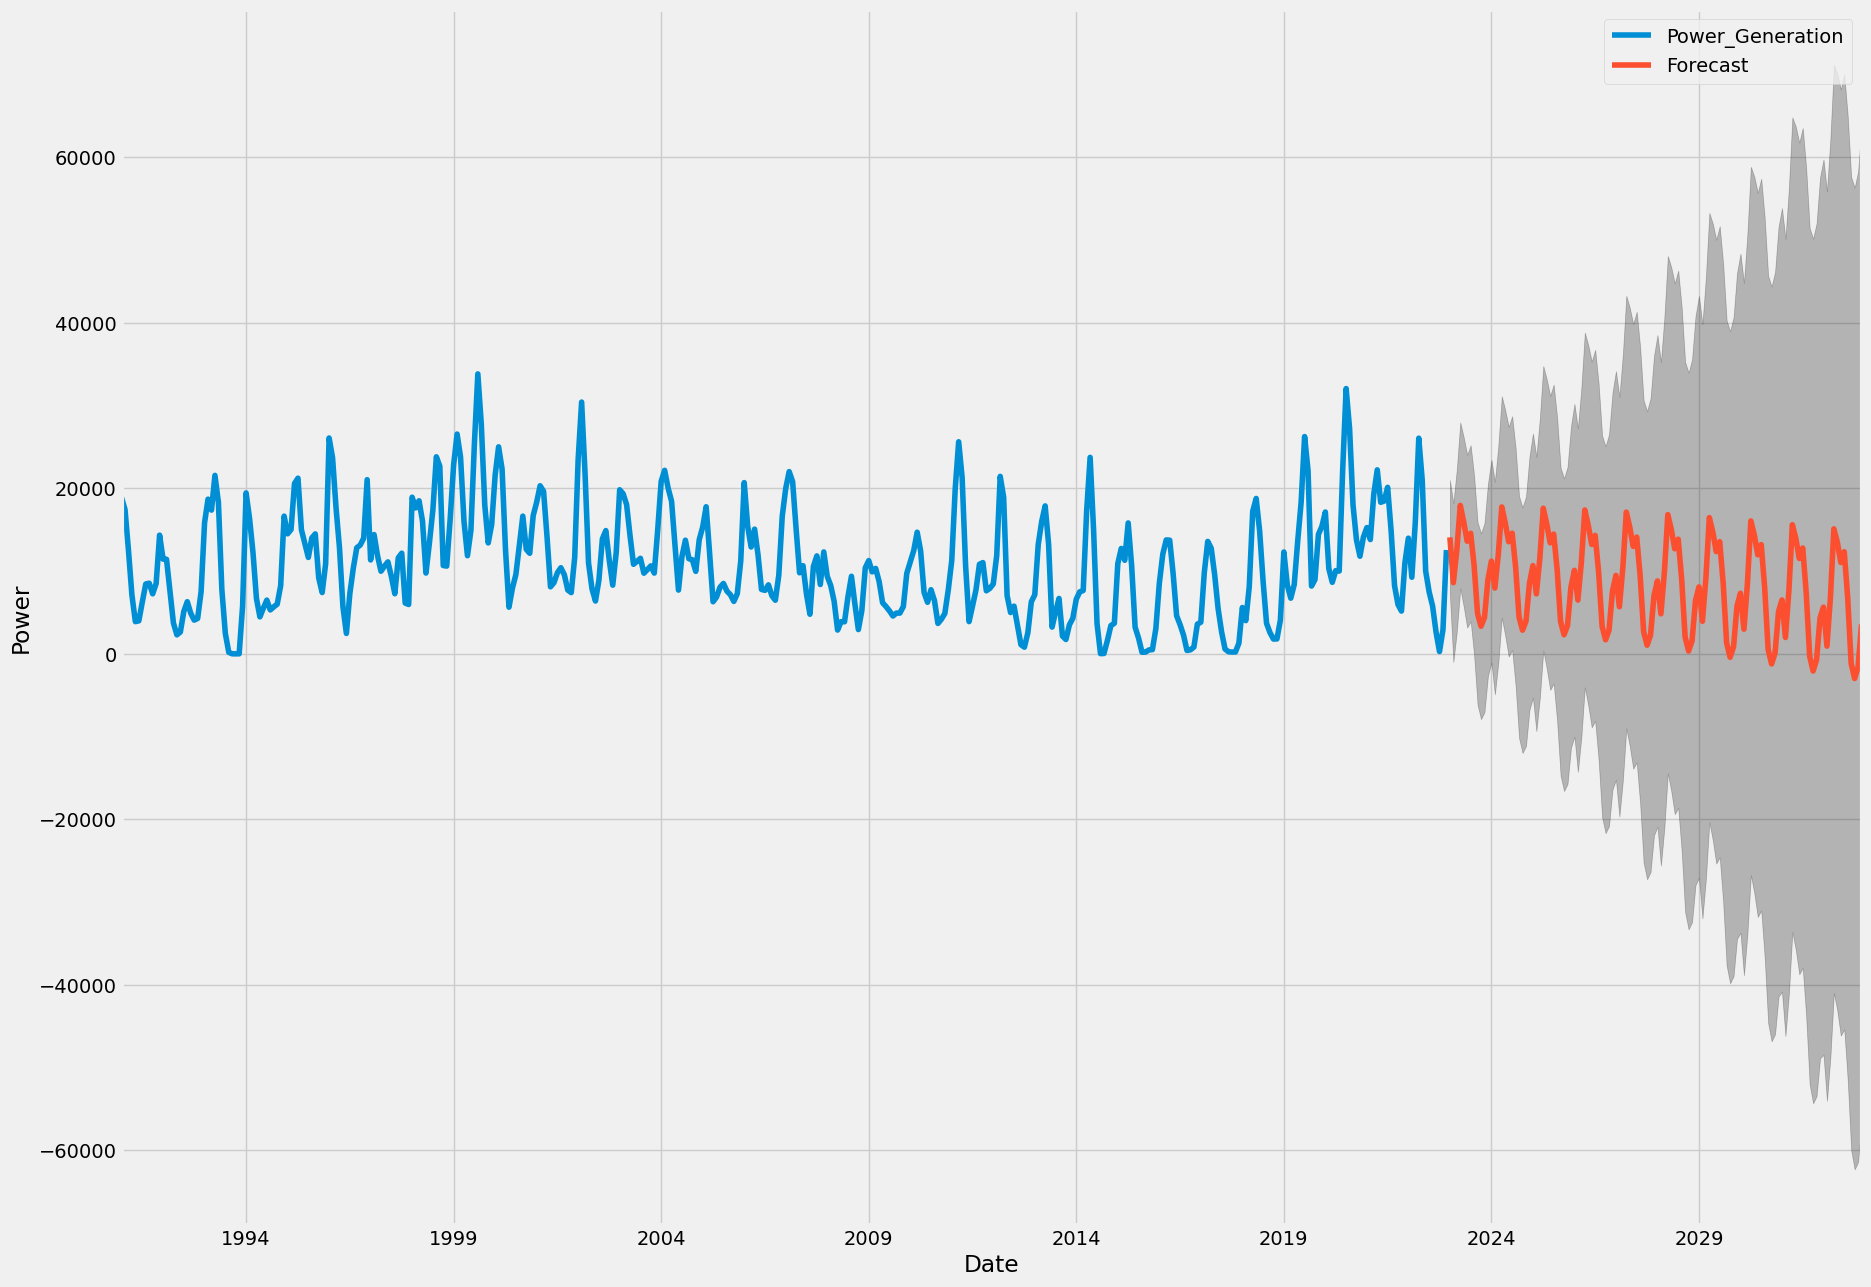

In [37]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Power')

plt.legend()
plt.show()